# Telco Churn Analysis

In [181]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, PolynomialFeatures, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Exploratory Data Analysys (EDA)

In [136]:
df = pd.read_excel(r'C:\Users\Jordan\Desktop\Data Science Folders\M5-P11-Classification_Project-main\churn.xlsx')
df

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,Female,...,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No,0,45,5306,NaN
7039,6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,...,One year,Yes,Mailed check,84.80,1990.5,No,0,59,2140,NaN
7040,2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,...,One year,Yes,Credit card (automatic),103.20,7362.9,No,0,71,5560,NaN
7041,4801-JZAZL,1,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,Female,...,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,59,2793,NaN


In [161]:
print(df.info())
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Country            7043 non-null   object 
 2   State              7043 non-null   object 
 3   City               7043 non-null   object 
 4   Zip Code           7043 non-null   int64  
 5   Latitude           7043 non-null   float64
 6   Longitude          7043 non-null   float64
 7   Gender             7043 non-null   int64  
 8   Senior Citizen     7043 non-null   int64  
 9   Partner            7043 non-null   int64  
 10  Dependents         7043 non-null   int64  
 11  Tenure Months      7043 non-null   float64
 12  Phone Service      7043 non-null   object 
 13  Multiple Lines     7043 non-null   object 
 14  Internet Service   7043 non-null   object 
 15  Online Security    7043 non-null   object 
 16  Online Backup      7043 

In [138]:
print(df['Churn Reason'].unique())
print(df['Churn Label'].unique())
print(df['Churn Reason'].isna().sum())

['Competitor made better offer' 'Moved' 'Competitor had better devices'
 'Competitor offered higher download speeds'
 'Competitor offered more data' 'Price too high' 'Product dissatisfaction'
 'Service dissatisfaction' 'Lack of self-service on Website'
 'Network reliability' 'Limited range of services'
 'Lack of affordable download/upload speed' 'Long distance charges'
 'Extra data charges' "Don't know" 'Poor expertise of online support'
 'Poor expertise of phone support' 'Attitude of service provider'
 'Attitude of support person' 'Deceased' nan]
['Yes' 'No']
5174


    There is too many NAN for this category ( Churn Reason ) to be any help at all, so I'll drop it

In [139]:
df = df.drop('Churn Reason', axis=1)

In [140]:
df.isna().sum()

CustomerID           0
Count                0
Country              0
State                0
City                 0
Zip Code             0
Lat Long             0
Latitude             0
Longitude            0
Gender               0
Senior Citizen       0
Partner              0
Dependents           0
Tenure Months        0
Phone Service        0
Multiple Lines       0
Internet Service     0
Online Security      0
Online Backup        0
Device Protection    0
Tech Support         0
Streaming TV         0
Streaming Movies     0
Contract             0
Paperless Billing    0
Payment Method       0
Monthly Charges      0
Total Charges        0
Churn Label          0
Churn Value          0
Churn Score          0
CLTV                 0
dtype: int64

In [143]:
print(df['Count'].nunique())
print(df['Churn Label'].unique())

1
['Yes' 'No']


In [144]:
df.drop('Count', axis=1, inplace=True)

In [145]:
df.dtypes

CustomerID            object
Country               object
State                 object
City                  object
Zip Code               int64
Lat Long              object
Latitude             float64
Longitude            float64
Gender                object
Senior Citizen        object
Partner               object
Dependents            object
Tenure Months          int64
Phone Service         object
Multiple Lines        object
Internet Service      object
Online Security       object
Online Backup         object
Device Protection     object
Tech Support          object
Streaming TV          object
Streaming Movies      object
Contract              object
Paperless Billing     object
Payment Method        object
Monthly Charges      float64
Total Charges         object
Churn Label           object
Churn Value            int64
Churn Score            int64
CLTV                   int64
dtype: object

In [146]:
df[['Lat_Extracted', 'Long_Extracted']] = df['Lat Long'].str.split(',', expand=True)

df['Lat_Extracted'] = df['Lat_Extracted'].str.strip().astype(float)
df['Long_Extracted'] = df['Long_Extracted'].str.strip().astype(float)

df['Lat_Match'] = df['Latitude'] == df['Lat_Extracted']
df['Long_Match'] = df['Longitude'] == df['Long_Extracted']

mismatches = df[(df['Lat_Match'] == False) | (df['Long_Match'] == False)]

print(mismatches[['Lat Long', 'Latitude', 'Longitude', 'Lat_Extracted', 'Long_Extracted', 'Lat_Match', 'Long_Match']])

# I've noticed that three of my columns since to all match each other, So before dropping one of them I did a small inquiry to
#see if they are the samething before disposing of 'Lat Long' or 'Longitude' & 'Latitude' to reduce the useless information in my
#dataset

###


df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors = 'coerce')

#This one is obvious, but to be able to use mathematical operations I need it to be in numeric. If there is categorical information
#in this columns it means its NaN 

mean_total_charges = df['Total Charges'].mean()

df['Total Charges'] = df['Total Charges'].fillna(mean_total_charges)

# after trying to plot my visualization , I've noticed that my Total Charges had 11 NA , So I took the mean of my 7043 rows 
# and filled my 11 missing values with it


Empty DataFrame
Columns: [Lat Long, Latitude, Longitude, Lat_Extracted, Long_Extracted, Lat_Match, Long_Match]
Index: []


In [147]:
df.drop(['Lat Long', 'Lat_Match', 'Long_Match', 'Lat_Extracted', 'Long_Extracted'],axis=1, inplace=True)

In [148]:
df.dtypes

CustomerID            object
Country               object
State                 object
City                  object
Zip Code               int64
Latitude             float64
Longitude            float64
Gender                object
Senior Citizen        object
Partner               object
Dependents            object
Tenure Months          int64
Phone Service         object
Multiple Lines        object
Internet Service      object
Online Security       object
Online Backup         object
Device Protection     object
Tech Support          object
Streaming TV          object
Streaming Movies      object
Contract              object
Paperless Billing     object
Payment Method        object
Monthly Charges      float64
Total Charges        float64
Churn Label           object
Churn Value            int64
Churn Score            int64
CLTV                   int64
dtype: object

Now my dataset seems clean and the columns all have the right type of data for them. Lets do a visualization to identify trends and patterns. 

## EDA Visualization

I'll do a visualization for a few types of informations ; Numerical, Numerical Relationship, Categorical, Correlations and than the Relationship between Numerical and Categorical. 

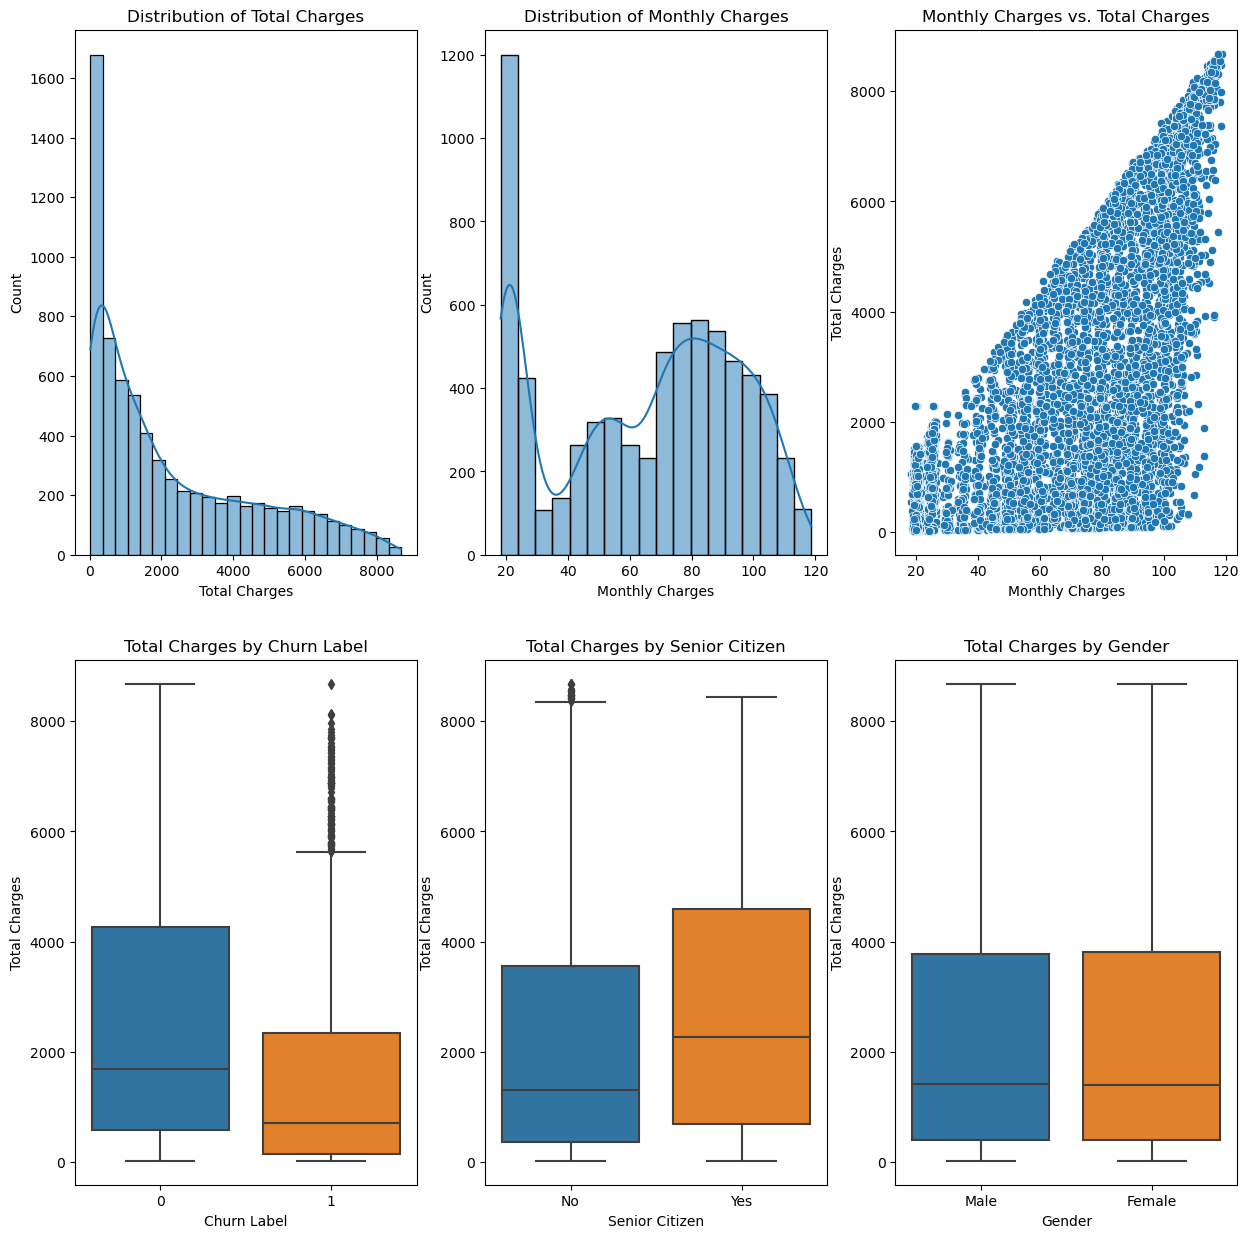

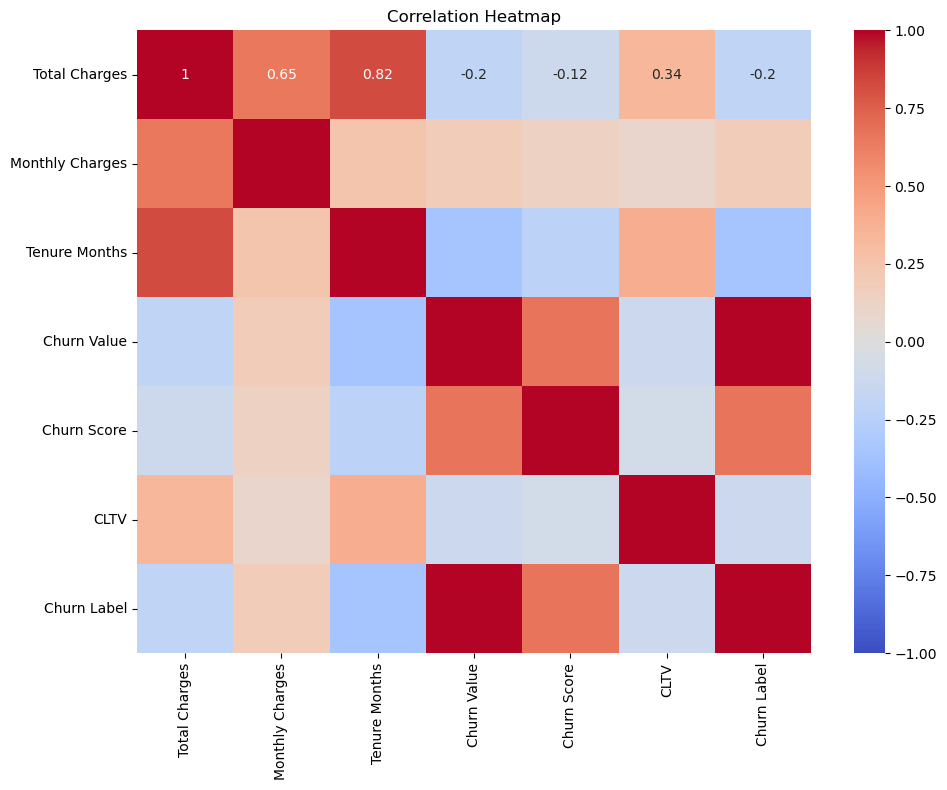

In [150]:
df['Churn Label'] = df['Churn Label'].map({'Yes': 1, 'No': 0})
numerical_features = ['Total Charges', 'Monthly Charges', 'Tenure Months', 'Churn Value', 'Churn Score', 'CLTV', 'Churn Label']
nrows = 2
ncols = 3

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 15))

axes = axes.flatten()

sns.histplot(df['Total Charges'], kde=True, ax=axes[0])
axes[0].set_title('Distribution of Total Charges')

sns.histplot(df['Monthly Charges'], kde=True, ax=axes[1])
axes[1].set_title('Distribution of Monthly Charges')

sns.scatterplot(x='Monthly Charges', y='Total Charges', data=df, ax=axes[2])
axes[2].set_title('Monthly Charges vs. Total Charges')

sns.boxplot(x='Churn Label', y='Total Charges', data=df, ax=axes[3])
axes[3].set_title('Total Charges by Churn Label')

sns.boxplot(x='Senior Citizen', y='Total Charges', data=df, ax=axes[4])
axes[4].set_title('Total Charges by Senior Citizen')

sns.boxplot(x='Gender', y='Total Charges', data=df, ax=axes[5])
axes[5].set_title('Total Charges by Gender')

plt.figure(figsize=(10, 8))
corr = df[numerical_features].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')

plt.tight_layout()
plt.show()

### Data Cleaning and Preparation

In [162]:
numeric_features = ['Zip Code', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen', 'Partner', 
                     'Dependents', 'Tenure Months', 'Monthly Charges', 'Total Charges', 
                     'Churn Value', 'Churn Score', 'CLTV']

categorical_features = ['Country', 'State', 'City', 'Phone Service', 'Multiple Lines', 
                        'Internet Service', 'Online Security', 'Online Backup', 
                        'Device Protection', 'Tech Support', 'Streaming TV', 
                        'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method']

In [167]:
#Imputing missing values with mean for the numerical values 

imputer = SimpleImputer(strategy='mean')
X_numeric_imputed = imputer.fit_transform(df[numeric_features])

In [166]:
#Imputing missing values with 'most frequent' and than encoding it into a numerical form using One Hot Encoding.

imputer_cat = SimpleImputer(strategy='most_frequent')
X_categorical_imputed = imputer_cat.fit_transform(df[categorical_features])


encoder = OneHotEncoder(sparse=False, drop='first')
X_categorical_encoded = encoder.fit_transform(df[categorical_features])

### Feature Engineering

In [169]:
# Creating an Interaction with Monthly Charges and Tenure Months. After reading into it, I can understand that a Tenure month
# Is basically a Monthly charges but on a loan of some sort. hopefully this interactions improve the model performance

df['ChargesMonthlyTenures'] = df['Monthly Charges'] * df['Tenure Months']



In [172]:
scaler = StandardScaler()
X_numeric_scaled = scaler.fit_transform(X_numeric_imputed)

X_prep = np.hstack((X_numeric_imputed, X_categorical_encoded))

y = df['Churn Value']

In [178]:
X_train, X_test, y_train, y_test= train_test_split(X_prep, y, test_size = 0.3, random_state = 42)

In [179]:
models = {
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

param_grids = {
    'KNN': {'n_neighbors': [3, 5, 7, 10]},
    'Decision Tree': {'max_depth': [None, 10, 20, 30]},
    'Random Forest': {'n_estimators': [50, 100, 200]}
}


for name, model in models.items():
    print(f"Training {name}...")
    grid_search = GridSearchCV(model, param_grids[name], cv=5, error_score='raise')
    grid_search.fit(X_train, y_train)
    print(f"Best Params for {name}: {grid_search.best_params_}")
    print(f"Best Score for {name}: {grid_search.best_score_}\n")

Training KNN...
Best Params for KNN: {'n_neighbors': 10}
Best Score for KNN: 0.7332657200811359

Training Decision Tree...
Best Params for Decision Tree: {'max_depth': None}
Best Score for Decision Tree: 1.0

Training Random Forest...
Best Params for Random Forest: {'n_estimators': 100}
Best Score for Random Forest: 0.9969574036511156



In [182]:
for name, model in models.items():
    print(f"Training {name}...")
    grid_search = GridSearchCV(model, param_grids[name], cv=5, error_score='raise')
    grid_search.fit(X_test, y_test)
    print(f"Best Params for {name}: {grid_search.best_params_}")
    print(f"Best Score for {name}: {grid_search.best_score_}\n")

Training KNN...
Best Params for KNN: {'n_neighbors': 10}
Best Score for KNN: 0.7084803872138752

Training Decision Tree...
Best Params for Decision Tree: {'max_depth': None}
Best Score for Decision Tree: 1.0

Training Random Forest...
Best Params for Random Forest: {'n_estimators': 200}
Best Score for Random Forest: 0.9938500666644258



I'm really unsure if the params and score are actually working. 1.0 Seems way too good so it might be a case of overfitting. 
I'll do a cross validation scheme to see what is going on here.

In [185]:
models = {
    'KNN': (KNeighborsClassifier(), {'n_neighbors': [3, 5, 7, 10]}),
    'Decision Tree': (DecisionTreeClassifier(), {'max_depth': [None, 10, 20, 30]}),
    'Random Forest': (RandomForestClassifier(), {'n_estimators': [50, 100, 150]})
}

cv = KFold(n_splits=5, shuffle=True, random_state=42)

results= {}
for model_name, (model, params) in models.items():
    grid_search = GridSearchCV(model, params, cv=cv, scoring= 'accuracy')
    grid_search.fit(X_train, y_train)
    results[model_name] = {
        'Best Parameters' :grid_search.best_params_,
        'Bestest Score': grid_search.best_score_
    }
    
print(results)

{'KNN': {'Best Parameters': {'n_neighbors': 10}, 'Bestest Score': 0.7340770791075051}, 'Decision Tree': {'Best Parameters': {'max_depth': None}, 'Bestest Score': 1.0}, 'Random Forest': {'Best Parameters': {'n_estimators': 150}, 'Bestest Score': 0.9969574036511156}}
